<a href="https://colab.research.google.com/github/Givari17/Project1/blob/main/Data_Cleansing_for_Telco_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](attachment:d46dfd11-bab0-45be-a334-89397d175882.png)

# DATA CLEANSING IN TELCO

Data cleansing adalah proses untuk mmeperbaiki data yang tidak tepat, hilang, salah format, dan atau terduplikasi. Data cleansing adalah hal yang harus dilakukan sebelum melakukan modeling data.

# DQLab STUDY CASE

Anda adalah seorang Data Engineer di sebuah perusahaan telco bernama DQLab Telco. Perusahaan memiliki banyak cabang yang tersebar di mana-mana. Sejak berdiri pada tahun 2019, DQLab telco konsisten untuk memperhatikan *customer experience*-nya sehingga tidak akan ditinggalkan pelanggan.

Walupun baru berumur 1 tahun lebih sedikit, sudah ada banyak pelanggan DQLab Telco yang beralih langganan ke kompetitor. Pihak *management* ingin mengurangi jumlah pelanggan yang beralih (*churn*) dengan menggunakan *machine learning*.

Oleh karena itu, tim Data Engineer diminta untuk mempersiapkan data untuk melakukan pemodelan untuk memprediksi dengan tepat pelanggan yang akan berhenti atau *churn*.

**Data Documentation**

Pada data yang akan kita gunakan, sudah terdapat dokumentasi terkait data yang akan kita gunakan. Dokumentasi berisi penjelasan singkat terkait kolom kolom yang akan digunakan.

* `UpdatedAt` periode of data taken
* `customerID` Customer ID
* `gender` Whether the customer is a male or a female (Male, Female)
* `SeniorCitizen` Whether the customer is a senior citizen or not (1, 0)
* `Partner` Whether the customer has a partner or not (Yes, No)
* `Dependents` Whether the customer has dependents or not (Yes, No)
* `tenure` Number of months the customer has stayed with the company
* `PhoneService` Whether the customer has a phone service or not (Yes, No)
* `MultipleLines` Whether the customer has multiple lines or not (Yes, No, No phone service)
* `InternetService` Customer’s internet service provider (DSL, Fiber optic, No)
* `OnlineSecurity` Whether the customer has online security or not (Yes, No, No internet service)
* `OnlineBackup` Whether the customer has online backup or not (Yes, No, No internet service)
* `DeviceProtection` Whether the customer has device protection or not (Yes, No, No internet service)
* `TechSupport` Whether the customer has tech support or not (Yes, No, No internet service)
* `StreamingTV` Whether the customer has streaming TV or not (Yes, No, No internet service)
* `StreamingMovies` Whether the customer has streaming movies or not (Yes, No, No internet service)
* `Contract` The contract term of the customer (Month-to-month, One year, Two year)
* `PaperlessBilling` Whether the customer has paperless billing or not (Yes, No)
* `PaymentMethod` The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* `MonthlyCharges` The amount charged to the customer monthly
* `TotalCharges` The total amount charged to the customer
* `Churn` Whether the customer churned or not (Yes or No)

**Tugas dan Langkah**

Dalam studi case ini, Anda akan diminta untuk melakukan data preprocessing (Data Cleansing) untuk data bulan Juni 2020. Langkah-langkah yang perlu dilakukan adalah:

1. Mencari ID pelanggan (No telepon) yang valid.
2. Mengatasi data-data yang masih kosong (missing values)
3. Mengatasi nilai nilai pencilan (outlier) dari setiap variable
4. Menstandarisasi nilai dari variable.

## Importing Library and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# option for display pandas DataFrame
pd.options.display.max_columns = 50
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

## 1. Data Summary

Data summary digunakan untuk memahami data secara singkat. Ada beberapa hal yang bisa kita lakukan, diantaranya:

1. Mengecek dimensi data
2. Melihat data tipe setiap kolom
3. Mengecek data null dan tidak null secara summary
4. Melakukan statistik deskriptif
5. Melihat subset data teratas dan terbawah

In [2]:
print(df_load.shape)

(7113, 22)


In [3]:
# mengecek tipe kolom, bisa dilakukan dengan memanggil atribut dtypes atau memanggil method `info()`
print(df_load.dtypes)

UpdatedAt             int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [4]:
# mengecek summary data null dapat dilakukan dengan beberapa cara
# menggunakan method `isnull()`
# memanggil method `info()`
# menghitung manual nilai null
print(df_load.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7113 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         7113 non-null   int64  
 1   customerID        7113 non-null   object 
 2   gender            7113 non-null   object 
 3   SeniorCitizen     7113 non-null   int64  
 4   Partner           7113 non-null   object 
 5   Dependents        7113 non-null   object 
 6   tenure            7014 non-null   float64
 7   PhoneService      7113 non-null   object 
 8   MultipleLines     7113 non-null   object 
 9   InternetService   7113 non-null   object 
 10  OnlineSecurity    7113 non-null   object 
 11  OnlineBackup      7113 non-null   object 
 12  DeviceProtection  7113 non-null   object 
 13  TechSupport       7113 non-null   object 
 14  StreamingTV       7113 non-null   object 
 15  StreamingMovies   7113 non-null   object 
 16  Contract          7113 non-null   object 


**Quis**

Misalkan ada sebuah data frame `df_load` yang terdiri dari 3 kolom, `col1`, `col2` dan `col3`. Bagaimana kita membuat kode python untuk menghitung nilai null secara manual? (hints: fungsi `len()` menghitung seluruh data, sedangkan method `.count()` untuk menghitung data tanpa missing value.)

Beri jeda 5 menit

In [5]:
# Melakukan statistika deskriptif dengan method `describe()`
df_load.describe()

,UpdatedAt,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7113.000000,7113.000000,7014.000000,7087.000000,7098.000000
mean,202005.999016,0.161816,32.749358,67.018985,2306.582650
std,0.031357,0.368308,25.206376,117.396646,2575.212013
min,202005.000000,0.000000,0.000000,0.000000,19.000000
25%,202006.000000,0.000000,9.000000,36.100000,402.925000
50%,202006.000000,0.000000,30.000000,70.450000,1400.700000
75%,202006.000000,0.000000,56.000000,89.900000,3801.600000
max,202006.000000,1.000000,500.000000,9000.000000,80000.000000


Perhatikan deskripsi data di atas, kita menemukan bahwa data `SeniorCitizen` memiliki nilai 0 dan 1 (min 0 dan max 1). Berdasarkan dokumentasi, dikatakan sebagai berikut `Whether the customer is a senior citizen or not (1, 0)`

Data seperti ini adalah data yang seharusnya bertipe kategorikal, bukan numerical. Untuk itu kita akan ganti tipenya menjadi string. (ini tidak harus dilakukan, tapi harus diingat pada saat pemodelan, kita harus memperlakukan data ini sebagai ketgorik dan bukan numeric. Pada bahasa pemrograman lain seperti R, data bertipe ini akan diconvert menjadi tipe khusus yaitu factor). Selain variable `SeniorCitizen`, kita juga mendapati count data pada tenure, MonthlyCharges, dan TotalCharges kurang dari 7113. Ini mengindikasikan bahwa pada data tersebut terdapat missing values.

In [6]:
df_load[['SeniorCitizen']] = df_load[['SeniorCitizen']].astype(str)
df_load.dtypes

UpdatedAt             int64
customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**Quis 2**

Jika Anda punya dataframe `df_load`, bagaimana Anda mengambil 6 data teratas dan 5 data terbawah?

Beri jedah 3 menit.

## 2. Mencari ID pelanggan yang valid.

Diketahui bahwa berdasarkan peraturan perusahaan, setiap ID pelanggan dinyatakan valid jika:
* Panjang karakter ID adalah 11-12.
* Terdidri dari angka saja, tidak boleh ada karakter berjenis lain.
* Diawali dengan angka 45 di 2 digit pertama.

Untuk menjawab pertanyaan ini, Anda harus memahami konsep regex (di luar scope pembahasan). Untuk melakukan pencarian kriteria data tertentu, kita bisa menggunakan method `str.match()` dari pandas series yang berbentuk object (string). Perhatikan data awal kita (inspect dengan method `info()` atau akses atribut `dtypes`), kolom customerID sudah berbentuk `str` yang diwakilkan dengan `object`. Karena sudah berbentuk `str`, maka seharusnya sudah memiliki method `str.match()`.

In [7]:
# mencari data dengan method match dari atribut str
df_load['customerID'].str.match(r'(45\d{9,10})')

0       True
1       True
2       True
3       True
4       True
        ... 
7108    True
7109    True
7110    True
7111    True
7112    True
Name: customerID, Length: 7113, dtype: bool

Notes: jawaban konsol DQLab adalah: `df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')`

Perubahan `astype(str)` di sini, tidak perlu dilakukan ketika teman teman melakukan real code, karena datanya sudah object(string). (Tunjukkan pada peserta method series untuk string dan int64.)

Setelah mengetahui regex untuk mencari datanya, selanjutnya kita simpan regex ini ke dalam kolom `valid_id`.

In [8]:
# jawaban di console DQLab
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')

Ambil data yang memiliki `valid_id` bernilai True. Lalu kemudian hitung jumlah row data baru yang memiliki id yang valid.

In [9]:
# ambil hanya kolom valid_id yang bernilai True lalu hapus kolom valid_id
# jawaban di console DQLab
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
# filter == True tidak lagi dibutuhkan.
# saat membuat real koding, langsung gunakan kolom valid_id
# df_load = (df_load[df_load['valid_id']]).drop('valid_id', axis = 1)

# Hitung jumlah row untuk kolom customerID yang valid.
df_load['customerID'].count()

7006

**Quis**

Bagaimana menghitung langsung jumlah ID yang valid dengan kolom valid_id?

beri jedah 5 menit.

Berbicara tentang validitas data customerID, kita juga perlu memperhatikan duplikasi datanya. Diketahui bahwa peraturan perusahaan melarang adanya transaksi duplikat untuk setiap customerID dalam satu bulan. Artinya pada data ini kita berekspectasi bahwa hanya ada 1 customerID yang melakukan transaksi.

Dari keterangan tim bisnis, data duplikasi ternyata terjadi karena hal-hal berikut:

- inserting melebihi satu kali dengan nilai yang sama pada tiap kolomnya
- duplikasi karena inserting beda periode pengambilan data.

Pertanyaannya, apakah data kita memiliki duplikasi?

In [10]:
# cek dimensi data
print(df_load.shape)
# cek duplikasi dengan method nunique()
df_load['customerID'].nunique()

(7006, 22)


6993

**Quis**

Apakah data customerID terduplikasi? Bagaimana Anda tau data tersebut terduplikasi?

Berdasarkan bisnis model, kita bisa melakukan cleansing pada duplicated values dengan cara sebagai berikut.

In [11]:
# menghapus duplikasi ketika kelebihan insert dengan nilai yang sama
# jawaban pada console adalah df_load.drop_duplicates()
df_load.drop_duplicates(inplace=True)
# menghapus duplikasi ketika ada faktor x (periode) dengan kemungkinan nilai yang berbeda
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')

# kode ini sama dengan 
df_load = df_load.sort_values('UpdatedAt', ascending=True).drop_duplicates('customerID', keep="last")

Notes: Pada console jawaban DQLab `df_load.drop_duplicates()` tidak memasukkan parameter inplace=True. Hal ini tidak akan berefek apapun terhadap data kita, kecuali dilakukan reassign.

**Optional, Why we sort values on 'UpdatedAt' on descending order before dropping the duplicates?**

In [12]:
df_duplicated = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')
df_duplicated['valid_id'] = df_duplicated['customerID'].str.match(r'(^45\d{9,10})')
df_duplicated.drop_duplicates(inplace=True)
df_duplicated = (df_duplicated[df_duplicated['valid_id'] == True]).drop('valid_id', axis = 1)
customerID_count = df_duplicated['customerID'].value_counts()
customerID_count[customerID_count > 1]

45995925610    2
45419036262    2
45819132957    2
45877978431    2
45168014322    2
45418334682    2
Name: customerID, dtype: int64

In [13]:
# kita mendapatkan 6 data terduplikat yang bukan disebabkan karena insert berlebihan
# selanjutnya kita cek pola atau pattern data ini
df_duplicated[df_duplicated['customerID'].str.match('(45168014322|45418334682|45419036262)')].sort_values(['customerID','UpdatedAt']).drop_duplicates('customerID', keep="last")

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
21,202006,45168014322,Male,0,Yes,No,12.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
19,202006,45418334682,Female,0,No,No,21.0,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.90,No
18,202006,45419036262,Female,0,Yes,Yes,10.0,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes


Ternyata data yang terduplikasi itu ada di periode 202005 dan 202006. Nah, periode yang kita gunakan adalah 202006. Untuk menentukan strategi sorting yang kita gunakan, kita baca dulu dokumentasi terkait method `drop_duplicates()`.

In [14]:
help(df_duplicated.drop_duplicates)

Help on method drop_duplicates in module pandas.core.frame:

drop_duplicates(subset: 'Hashable | Sequence[Hashable] | None' = None, keep: "Literal['first'] | Literal['last'] | Literal[False]" = 'first', inplace: 'bool' = False, ignore_index: 'bool' = False) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Return DataFrame with duplicate rows removed.
    
    Considering certain columns is optional. Indexes, including time indexes
    are ignored.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to keep.
        - ``first`` : Drop duplicates except for the first occurrence.
        - ``last`` : Drop duplicates except for the last occurrence.
        - False : Drop all duplicates.
    inplace : bool, default False
  

Dari dokumentasinya, ternyata method `drop_duplicates()` akan menyimpan value pertama dari nilai yang double. Value ini dikontrol oleh parameter dengan nama `keep`. Dokumentasi berbunyi `keep : {'first', 'last', False}, default 'first'`. Karena parameter ascending secara default bernilai True yang artinya 202005 akan muncul terlebih dahulu, sedangkan default yang diambil adalah yang pertama, maka untuk mendapatkan data periode 202006, kita bisa menggunakan 2 logic.
1. Mengubah parameter ascending menjadi False.
2. Tetap menggunakan ascending True dengan mengubah parameter keep menjadi last.

Notes: Konsole DQLab menggunakan metode yang pertama.

## 3. Mengatasi data-data yang masih kosong (missing values)

Pada materi data quality, ketika menghadapi missing values, kita punya beberapa pilihan seperti: menghapus kolom-nya (tidak menggunakan fitur yang data-nya hilang), menghapus record yang nilai-nya hilang atau mengganti nilai yang hilang dengan nilai statistik lain atau nilai predictive.

In [15]:
df_null_cust = (df_load.isnull().sum()[df_load.isnull().sum() > 1]/len(df_load.index))
# [val for val in df_null_cust]
pd.Series(["{0:.2f}%".format(val * 100) for val in df_null_cust], index=df_null_cust.index)

tenure            1.42%
MonthlyCharges    0.37%
TotalCharges      0.21%
Churn             0.61%
dtype: object

Di sini kita melihat ada 4 kolom yang memiliki nilai missing value dengan total persentase missing value di bawah 10%. Dari keterangan bisnis user, missing value untuk tenor dapat diisi dengan nilai `11`, sedangkan nilai missing value untuk kolom numeric lainnya diisi dengan median datanya. Sedangkan untuk kolom churn, ketika ada missing value, kita akan hapus records yang missing.

In [16]:
# menghapus record dengan missing value
df_load.dropna(subset=['Churn'], inplace=True)
# mengganti nilai numeric tenure dengan angka 11
df_load['tenure'].fillna(11, inplace=True)

# mengganti nilai numeric lain selain tenure dengan nilai mediannya
for col_name in ['MonthlyCharges', 'TotalCharges']:
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)
    
# Note untuk jawaban pada console DQLab:
for col_name in list(['MonthlyCharges', 'TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)
# dilakukan conversi ke list untuk ['MonthlyCharges','TotalCharges']
# dalam dunia kodingan nyata, sebaiknya tidak dilakukan
# karena ['MonthlyCharges','TotalCharges'] sudah dalam bentuk list
# mengubah list menjadi list adalah hal yang kurang efektif.

In [17]:
# cara lain untuk mengubah nilai numeric lain menjadi median adalah dengan kombinasi apply dan lambda
df_load = df_load.apply(lambda x: x.fillna(x.median()) if x.dtype.kind in 'biufc' else x, axis=1)

# referensi dtype kind https://numpy.org/doc/stable/reference/generated/numpy.dtype.kind.html

In [18]:
df_load['MonthlyCharges'].dtype.kind

'f'

**Mengapa Kita Menggunakan Median untuk Mengisi Nilai Yang Hilang?**

Sebelum memutuskan untuk mengisi nilai yang hilang dengan suatu nilai statistik, kita terlebih dahulu harus memahami datanya. Salah satu aspek yang bisa kita analisa adalah marjinal distribusinya. Untuk melihat marjina distribusinya, kita bisa menggunakan histogram ataupun grafik density.

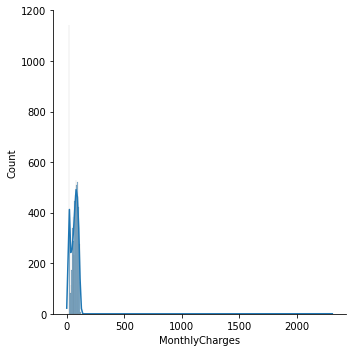

In [19]:
sns.displot(df_load, x="MonthlyCharges", kde=True)
plt.show()

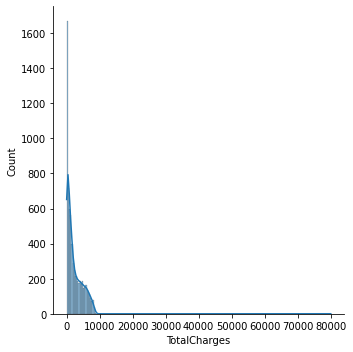

In [20]:
sns.displot(df_load, x="TotalCharges", kde=True)
plt.show()

## 3. Mengatasi nilai nilai pencilan (outlier) dari setiap variable

Pada materi data quality with Python dijelaskan bahwa untuk mendeteksi outliers, kita bisa menggunakan IQR (interquartile range) untuk mendeteksi keberadaan outliers. Cara lain yang paling populer untuk melihat outlier adalah dengan menggunakan boxplot.

![image.png](attachment:912ab7e8-38b6-4837-9c01-7103eecbea5a.png)

Pada kondisi data telco kita, kita diminta untuk mengatasi data outlier dari kolom tenure, MonthlyCharges, dan TotalCharges. Namun sebelum mengisi nilai outliers itu, tentunya kita harus tahu, benarkah ada nilai outlier pada ketiga variable tersebut? Untuk mengetahuinya kita bisa membuat boxplot sebagai berikut.

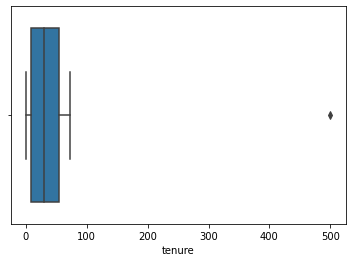

In [21]:
# untuk menampilkan boxplot dengan seaborn, ada 2 cara
# cara 1 sesuai dengan kurikulum DQLab
plt.figure()  # membuat chart baru 
sns.boxplot(x=df_load["tenure"])
plt.show()

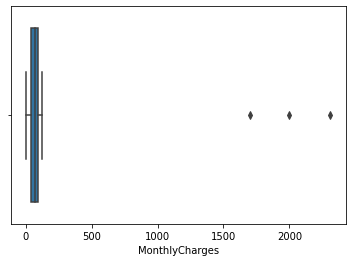

In [22]:
plt.figure()  # membuat chart baru 
sns.boxplot(x=df_load["MonthlyCharges"])
plt.show()

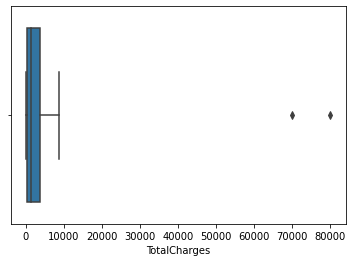

In [23]:
plt.figure()  # membuat chart baru 
sns.boxplot(x=df_load["TotalCharges"])
plt.show()

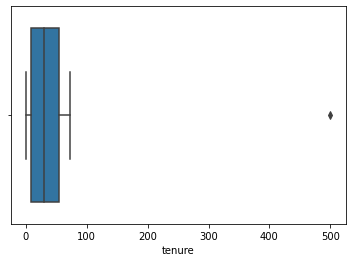

In [24]:
# bisa juga tanpa deklarasi figure dan dengan menggunakan argument data
sns.boxplot(x="tenure", data=df_load)
plt.show()

**Quis**

Tuliskan kode Python untuk mencari data outlier pada data frame `df_load` di kolom `tenure` secara manual?
(hints: gunakan method `quantile()`, cari IQR)

Beri jeadah 10 menit.

Sebelumnya dengan boxplot, kita sudah mengetahui bahwa ada nilai outlier, atau pencilan data pada ketiga kolom. Kita diminta untuk mengisi nilai outlier ini dengan nilai batas maksimum dan minimum data dianggap tidak outlier. Untuk melakukan ini, kita pelu melakukan beberapa langkah:

1. Mencari nilai batas maksimum dan minimum dari data yang kita ingin ganti nilainya
2. Mengubah nilai outlier dengan nilai minimum dan maksimum yang kita peroleh.

In [35]:
df_load, maximum = df_load.align(maximum, axis=1, copy=False)
maximum

Churn                      NaN
Contract                   NaN
Dependents                 NaN
DeviceProtection           NaN
InternetService            NaN
MonthlyCharges       169.93125
MultipleLines              NaN
OnlineBackup               NaN
OnlineSecurity             NaN
PaperlessBilling           NaN
Partner                    NaN
PaymentMethod              NaN
PhoneService               NaN
SeniorCitizen              NaN
StreamingMovies            NaN
StreamingTV                NaN
TechSupport                NaN
TotalCharges        8889.13125
UpdatedAt                  NaN
customerID                 NaN
gender                     NaN
tenure               124.00000
Name: maximum, dtype: float64

In [26]:
# approach 01 sesuai console DQLab
Q1 = df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].quantile(0.25)
Q3 = df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


<ipython-input-26-d192d651bb35>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df_load > maximum)
<ipython-input-26-d192d651bb35>:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (df_load < minimum)


Notes : Pada kode di atas, jika Anda menggunakan pandas versi terbaru akan muncul deprecation warning. Deprecation warning ini artinya adalah pada versi terbaru pandas nantinya, kode di atas tidak lagi bisa langsung diimplementasikan. Jika Anda ingin melakukan hal yang sama pada dunia nyata, maka sebelum kode `more_than = (df_load > maximum)`, Anda tuliskan kode `df_load, maximum = df_load.align(maximum, axis = 1, copy = False)`.

In [27]:
# aproach 2
Qu = df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].quantile([0.25, .75])
IQR = Qu.iloc[1] - Qu.iloc[0]
Qu.iloc[0] -= (1.5 * IQR)
Qu.iloc[1] += (1.5 * IQR)
Qu.index = ['minimum', 'maximum']
df_load, maximum = df_load.align(Qu.loc["maximum"], axis=1, copy=False)
df_load, minimum = df_load.align(Qu.loc["minimum"], axis=1, copy=False)
less_than, greater_than = (df_load < minimum), (df_load > maximum) 
df_load = df_load.mask(less_than, minimum, axis=1)
df_load = df_load.mask(greater_than, maximum, axis=1)

## 4. Menstandarisasi nilai dari variable.

Pada kasus terakhir ini, kita berinisiatif untuk mengecek setiap variable data yang kita miliki. Yang kita lakukan adalah mengecek nilai unik setiap variable kategorisnya. Tidak standarnya suatu data bisa terjadi karena adanya kesalahan input. Untuk mengecek variable kategorik yang tidak standar, kita pertama-tama bisa mengecek nilai uniknya.

In [28]:
# jawaban sesuai console
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
	print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
	print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

In [29]:
for col_name in df_load.columns.to_list():
    if df_load[col_name].dtype.kind in 'O' and col_name != 'customerID':
        print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
        print(df_load[col_name].value_counts())
        
# update: bisa juga langsung series tanpa diubah ke list
for col_name in df_load.columns:
    if df_load[col_name].dtype.kind in 'O' and col_name != 'customerID':
        print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
        print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable Churn
No       5114
Yes      1827
Churn       9
Name: Churn, dtype: int64

Unique Values Count Before Standardized  Variable Contract
Month-to-month    3823
Two year          1670
One year          1457
Name: Contract, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable DeviceProtection
No                     3054
Yes                    2391
No internet service    1505
Name: DeviceProtection, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable OnlineBacku

Setelah kita mengetahui, mana saja data yang tidak standard, kita selanjutnya mengisi data teersebut dengan nilai atau value standardnya. Misalnya pada data gender, kita mendapati record `male` dan `laki-laki`. Record ini merujuk pada satu entitas yang sama, tapi diakui berbeda. Karena `male` memiliki proporsi lebih banyak, mari kita anggap bahwa sebenarnya record yang benar adalah `male`. Begitu juga dengan record record lainnya.

In [30]:
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(df_load[col_name].value_counts())
    
# Notes: seperti sebelumnya, perintah list() dalam koding nyata tidak perlu dipakai karena data sudah dalam bentuk list.


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


**Materi Tambahan Dari Pertanyaan Peserta**

1. Link referensi pandas

link official [Pandas Official Reference](https://pandas.pydata.org/docs/reference/frame.html).

Tanpa link official, Anda juga bisa mengeksplorasi object pandas data frame secara mandiri tanpa mengakses link apa pun. Untuk melihat atribut dan method yang ada di dalam pandas data frame, Anda dapat menggunakan fungsi `dir()`. Misal, anda menyimpan object data frame pada variable `df_load`. Maka untuk mengakses semua methodnya anda tinggal menulis perintah `dir(df_load)` lalu jalankan.

Untuk kemudian membaca atau melihat dokumentasi sebuah method, misalnya method iloc, Anda cukup gunakan perintah `help()`, cukup menuliskan `help(df_load.iloc)`. Anda akan mendapatkan keterangan persis seperti di website pandas tersebut. Selamat belajar.

2. Bagaimana Cara Mengganti Nama Kolom Dengan Karakter Tertentu Menjadi _?

Misalkan Anda punya data frame dengan nama `no.Majalah`, `tanggal.Terbit`, `no.Editorial`.

Hal pertama yang Anda perhatikan adalah pola-nya. Di sini, kita mau mengganti tanda `.` dengan tanda `_`. Kita juga mau mengganti nama kolomnya menjadi huruf kecil. Maka ada beberapa approach yang bisa dilakukan. Berikut dua diantaranya. (Perhatikan kodingan di bawah)

In [31]:
# approach 1, manual. TIDAK RECOMMENDED
# buat dataframe baru dengan nama df_contoh
df_contoh = pd.DataFrame({"no.Majalah": [a for a in range(10)],
                          "tanggal.Terbit": [24, 27, 29, 30, 21, 15, 5, 6, 3, 24],
                          "masa.Berlaku": [12, 2, 12, 4, 6, 4, 14, 15, 19, 10]
                         })
old_col = df_contoh.columns.to_list()
for i in range(len(old_col)):
    old_col[i] = old_col[i].replace(".", "_").lower()
print(old_col)
# masukkan ke dalam dataframe
df_contoh.columns = old_col
df_contoh

['no_majalah', 'tanggal_terbit', 'masa_berlaku']


,no_majalah,tanggal_terbit,masa_berlaku
0,0,24,12
1,1,27,2
2,2,29,12
3,3,30,4
4,4,21,6
5,5,15,4
6,6,5,14
7,7,6,15
8,8,3,19
9,9,24,10


In [34]:
# approach 2, dengan mengambil nama kolom dan list generator
# buat dataframe baru dengan nama df_contoh
df_contoh = pd.DataFrame({"no.Majalah": [a for a in range(10)],
                          "tanggal.Terbit": [24, 27, 29, 30, 21, 15, 5, 6, 3, 24],
                          "masa.Berlaku": [12, 2, 12, 4, 6, 4, 14, 15, 19, 10]
                         })
print(df_contoh)
new_name = [a.replace(".", "_").lower() for a in df_contoh.columns]
print(new_name)
# masukkan ke dalam dataframe
df_contoh.columns = new_name
df_contoh

   no.Majalah  tanggal.Terbit  masa.Berlaku
0           0              24            12
1           1              27             2
2           2              29            12
3           3              30             4
4           4              21             6
5           5              15             4
6           6               5            14
7           7               6            15
8           8               3            19
9           9              24            10
['no_majalah', 'tanggal_terbit', 'masa_berlaku']


,no_majalah,tanggal_terbit,masa_berlaku
0,0,24,12
1,1,27,2
2,2,29,12
3,3,30,4
4,4,21,6
5,5,15,4
6,6,5,14
7,7,6,15
8,8,3,19
9,9,24,10


In [33]:
# approach 3, langsung ubah aja dari seriesnya
df_contoh = pd.DataFrame({"no.Majalah": [a for a in range(10)],
                          "tanggal.Terbit": [24, 27, 29, 30, 21, 15, 5, 6, 3, 24],
                          "masa.Berlaku": [12, 2, 12, 4, 6, 4, 14, 15, 19, 10]
                         })
print(df_contoh)
df_contoh.columns = pd.Series(df_contoh.columns).str.replace(".", "_", regex=False).str.lower()
df_contoh


   no.Majalah  tanggal.Terbit  masa.Berlaku
0           0              24            12
1           1              27             2
2           2              29            12
3           3              30             4
4           4              21             6
5           5              15             4
6           6               5            14
7           7               6            15
8           8               3            19
9           9              24            10


,no_majalah,tanggal_terbit,masa_berlaku
0,0,24,12
1,1,27,2
2,2,29,12
3,3,30,4
4,4,21,6
5,5,15,4
6,6,5,14
7,7,6,15
8,8,3,19
9,9,24,10


In [32]:
# approach 4
### YOU WRITE IT ###

~    
    
Tips: Ada banyak jalan menuju Roma. Jangan terpaku pada satu jenis approach. Cobalah untuk berpikir logis,
jangan ragu buat coba-coba. Semoga berhasil.

~